<a href="https://colab.research.google.com/github/KashishChanana/OneFourthLabs/blob/master/Python_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Drive and Colab integration** 

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1qQdR91Kaa9SbGRvl82uGmjg76zlKhV7R


In [0]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'First file.txt'})
uploaded.SetContentString('HELLO world its me')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1Q-NnvEU7xFVMX1ejWzcyO602JUDFEpv-


In [0]:
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title Sample file.txt, id 1xOOoWfxrWeUEka3x6nDtFL0MJAHpjLDE
title Sample file.txt, id 1g7mFHCWDeCiofaw4816iPGykiY69Zdnh
title Sample file.txt, id 1qQdR91Kaa9SbGRvl82uGmjg76zlKhV7R
title First file.txt, id 1Q-NnvEU7xFVMX1ejWzcyO602JUDFEpv-
title Sample file.txt, id 1cNO7iD4AuiYeLMymTgLGdROEqpy8VLfP


In [0]:
file_id = '17zTCbX4D8By3t2srHqgaD2LRpS-pnsSl' #https://drive.google.com/open?id=
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('iris.csv')

In [0]:
!ls

adc.json  iris.csv  sample_data


# **Pandas**

In [0]:
import pandas as pd

In [0]:
df= pd.read_csv('iris.csv')

In [0]:
df.head()

,sepal length,sepal width,petal length,petal width,classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
df.tail()

,sepal length,sepal width,petal length,petal width,classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
len(df)

150

In [0]:
df.shape

(150, 5)

In [0]:
df.loc[5]

sepal length              5.4
sepal width               3.9
petal length              1.7
petal width               0.4
classification    Iris-setosa
Name: 5, dtype: object

In [0]:
df_short=df[['sepal length', 'sepal width', 'petal length', 'petal width', 'classification']]

In [0]:
df_short.shape

(150, 5)

In [0]:
df_setosa= df[df['classification']=='Iris-setosa']

In [0]:
df_setosa.shape

(50, 5)

In [0]:
df_short['petal width'].mean()

1.1986666666666672

In [0]:
df_short.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
g= df_short.groupby(['classification'])

In [0]:
for key, df_key in g:
  print('******************')
  print(key)
  print("******************")
  print(df_key)

******************
Iris-setosa
******************
    sepal length  sepal width  petal length  petal width classification
0            5.1          3.5           1.4          0.2    Iris-setosa
1            4.9          3.0           1.4          0.2    Iris-setosa
2            4.7          3.2           1.3          0.2    Iris-setosa
3            4.6          3.1           1.5          0.2    Iris-setosa
4            5.0          3.6           1.4          0.2    Iris-setosa
5            5.4          3.9           1.7          0.4    Iris-setosa
6            4.6          3.4           1.4          0.3    Iris-setosa
7            5.0          3.4           1.5          0.2    Iris-setosa
8            4.4          2.9           1.4          0.2    Iris-setosa
9            4.9          3.1           1.5          0.1    Iris-setosa
10           5.4          3.7           1.5          0.2    Iris-setosa
11           4.8          3.4           1.6          0.2    Iris-setosa
12           4

In [0]:
g.mean()

,sepal length,sepal width,petal length,petal width
classification,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

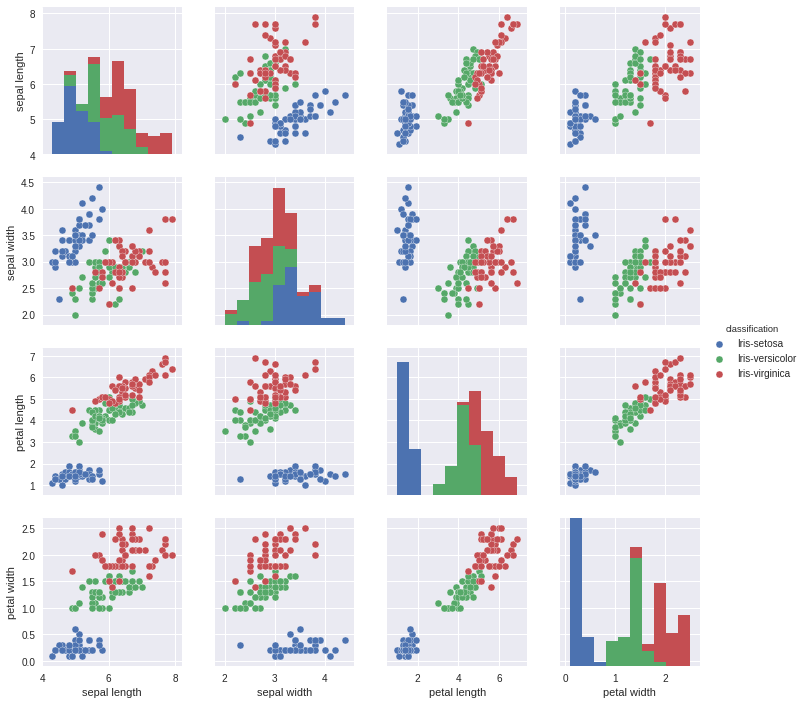

In [0]:
ax= sns.pairplot(df_short, diag_kind='hist', hue='classification')

# **Vetors**

In [0]:
import numpy as np

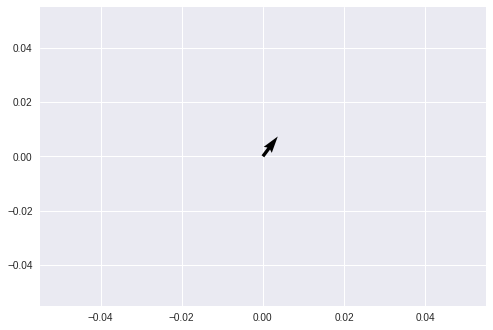

In [0]:
plt.quiver(0,0,3,4)
plt.show()

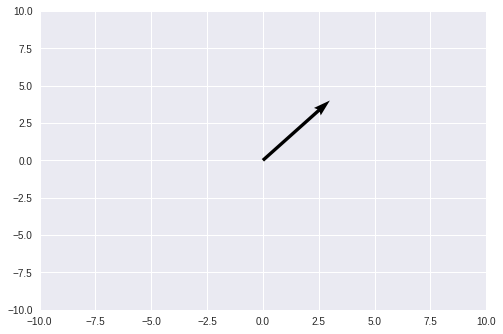

In [0]:
plt.quiver(0,0,3,4, scale_units='xy', angles='xy', scale=1 )
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

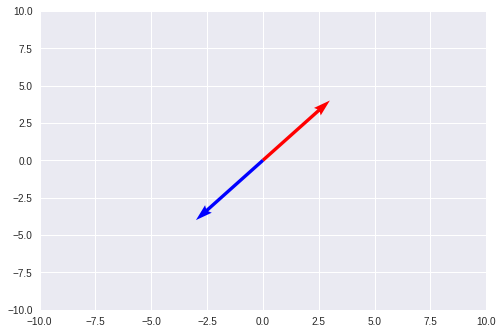

In [0]:
plt.quiver(0,0,3,4, scale_units='xy', angles='xy', scale=1 ,color='red')
plt.quiver(0,0,-3,-4, scale_units='xy', angles='xy', scale=1 ,color='blue')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

In [0]:
def plot_vectors(vect):
  i=0
  colors=['r','b','g','y']
  for vec in vect:
    plt.quiver(vec[0],vec[1],vec[2],vec[3], scale_units='xy', angles='xy', scale=1 ,color=colors[i%len(colors)])
    i+=1
  plt.xlim(-10,10)
  plt.ylim(-10,10)
  plt.show()

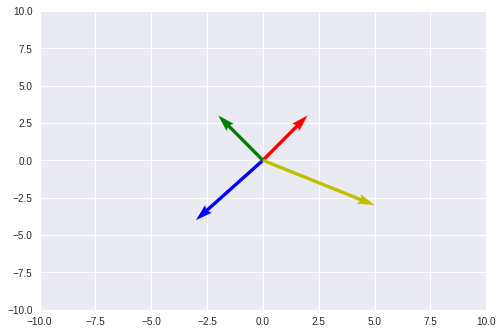

In [0]:
plot_vectors([(0,0,2,3),(0,0,-3,-4),(0,0,-2,3),(0,0,5,-3)])

In [0]:
vecs=[np.asarray((0,0,2,3)),np.asarray((0,0,-3,-4)),np.asarray((0,0,-2,3)),np.asarray((0,0,5,-3))]

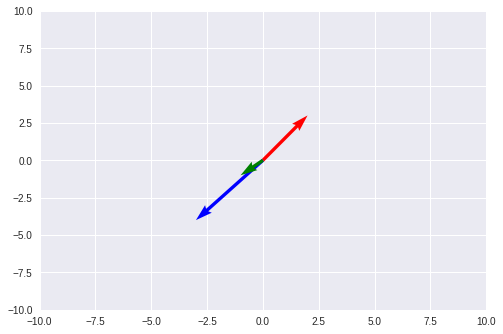

In [0]:
plot_vectors([vecs[0], vecs[1], vecs[0]+vecs[1]])

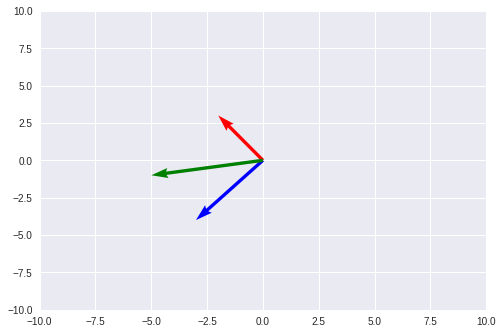

In [0]:
plot_vectors([vecs[2], vecs[1], vecs[2]+vecs[1]])

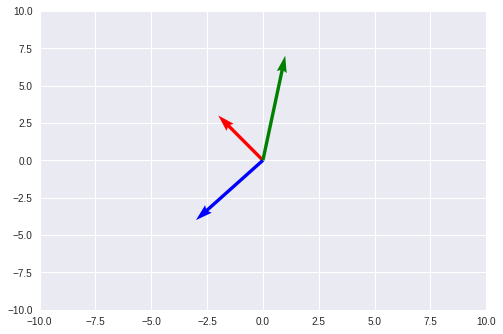

In [0]:
plot_vectors([vecs[2], vecs[1], vecs[2]-vecs[1]])

In [0]:
np.dot(vecs[0], vecs[1])

-18